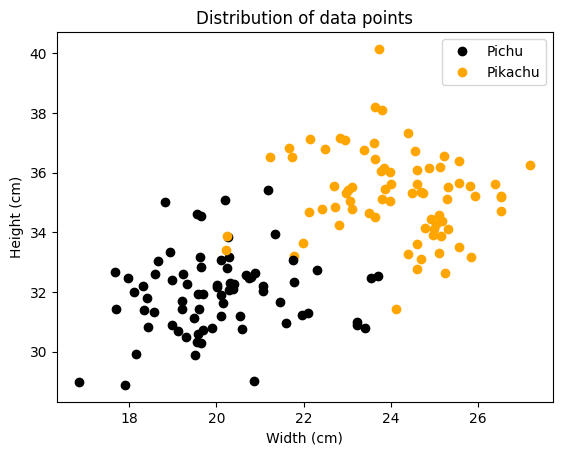

The given point (12.0, 12.0) is classified as Pichu.
Sample with (width, height): [25.0, 32.0] classified as Pikachu.
Sample with (width, height): [24.2, 31.5] classified as Pikachu.
Sample with (width, height): [22.0, 34.0] classified as Pikachu.
Sample with (width, height): [20.5, 34.0] classified as Pichu.


In [103]:
import matplotlib.pyplot as plt

data_filename = "datapoints.txt"
test_filename = "testpoints.txt"

# Läser in datapunkter från fil och lagra dem i en lista.
traindata_list = []
with open(data_filename) as simulated_data:
    # Exkluderar den första redan som innehåller etikettinformation och kolumnbeskrivningar.
    data_content = [line.strip("\n") for line in simulated_data.readlines()[1:]]

# Boolean-variabler för att säkerställa att varje kategori endast representeras en gång i plot-legenden.
pichu_label_added = False
pikachu_label_added = False

# Itererar datapunkter, extraherar och plottar varje punkt.
for dataline in data_content: 
    data_width, data_height, data_class = map(float, dataline.split(","))  
    
    # Visualiserar datapunkter baserat på deras klassetikett.
    if data_class == 0:
        if not pichu_label_added:
            plt.plot(data_width, data_height, 'o', color='black', label='Pichu')
            pichu_label_added = True
        else:
            plt.plot(data_width, data_height, 'o', color='black')
    elif data_class == 1:
        if not pikachu_label_added:
            plt.plot(data_width, data_height, 'o', color='orange', label='Pikachu')
            pikachu_label_added = True
        else:
            plt.plot(data_width, data_height, 'o', color='orange')

    traindata_list.append((data_width, data_height))

# Läser in testdatapunkter från fil och lagra dem i en lista.
testdata_list = []
with open (test_filename) as test_data:
    test_content = test_data.readlines()[1:]

for testline in test_content:
    # Extraherar koordinater från varje rad    
    testline = testline.split(')')[0].split('(')[-1] # Kodsnutt "[-1]" taget från Hossein Hussain
    test_width, test_height = map(float, testline.split(","))
    testdata_list.append([test_width, test_height])

plt.xlabel('Width (cm)')
plt.ylabel('Height (cm)')
plt.title('Distribution of data points')
plt.legend()
plt.show()

def compute_distance(test_point, data_point):
    x1, y1 = test_point
    x2, y2 = data_point
    # Beräknar det euklidiskt avstånd mellan två punkter i ett tvådimensionellt rum med Pythagoras sats.
    return ((x2 - x1)**2 + (y2 - y1)**2)**0.5

def classify_point(test_point, training_data_content):
    min_distance = float('inf') # Kodsnutt "float('inf')" taget med hjälp av ChatGPT.
    nearest_class = None

    for dataline in training_data_content:
        data_width, data_height, data_class = map(float, dataline.split(","))
        data_point = (data_width, data_height)
        distance = compute_distance(test_point, data_point)

        if distance < min_distance:
            min_distance = distance
            nearest_class = data_class

    return nearest_class

def get_user_input():
    while True:
        user_input = input("Enter a test point in the format 'width, height': ")
        try:
            # Försöker omvandla inmatningen till flyttal
            width, height = map(float, user_input.split(','))
            
            # Kontrollerar om värdena är negativa
            if width < 0 or height < 0:
                raise ValueError("Negative values are not accepted.")
                
            return (width, height)
        except ValueError:
            print("Invalid input. Please try again with the format 'width, height' and positive numbers.")

# Hämta punkt från användaren
user_test_point = get_user_input()

# Klassificera användarens punkt
user_nearest_class = classify_point(user_test_point, data_content)

if user_nearest_class == 0:
    print(f"The given point {user_test_point} is classified as Pichu.")
elif user_nearest_class == 1:
    print(f"The given point {user_test_point} is classified as Pikachu.")

# Klassificerar varje testdatapunkt genom att söka den närmaste punkten i träningsdata enligt "Närmaste granne"-metoden.
for test_point in testdata_list:
    nearest_class = classify_point(test_point, data_content)

    # Skriver ut klassificeringen av testpunkter
    if nearest_class == 0:
        print(f"Sample with (width, height): {test_point} classified as Pichu.")
    elif nearest_class == 1:
        print(f"Sample with (width, height): {test_point} classified as Pikachu.")